# Explore The Taylor Swift Lyrics - NLP


[https://www.kaggle.com/PromptCloudHQ/taylor-swift-song-lyrics-from-all-the-albums]


Taylor Swift Song Lyrics from all the albums
All the song lyrics from Taylor Swift's albums

__________________________________________________________________________________________________________________________________________________________

Context
This data set was created by PromptCloud (a Data-as-a-Service provider), using the API exposed by Genius.com.

Content

It has the following data fields:


album name

track title

track number

lyric text

line number of the lyric in the track

year of release of the album

Initial analyses

You can check out this article to understand the following initial set of analysis:

– Exploratory analysis

word counts based on tracks and albums

time series analysis of word counts

distribution of word counts

– Text mining


word cloud

bigram network

sentiment analysis (includes chord diagram)

Text EDA using lyrics from Taylor Swift :)
The dataset contains follwing fields

- Album name

- Track title

- Track number

- Lyric text

- Line number of the lyric in the track

- Year of release of the album

In [2]:
!pip install plotly

In [7]:
!python -m spacy download en



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import datetime as dt

# 멀티라인 출력을 지원하도록 한다.(한 셀내에 여러개의 변수명을 출력하게 끔 함)
# 참고 - https://crazyj.tistory.com/168
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#그래프 설정
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 14
width = 0.75

#워드클라우드
from wordcloud import WordCloud, STOPWORDS

#불용어 제거 
from nltk.corpus import stopwords

#defaultdict()는 딕셔너리를 만드는 dict클래스의 서브클래스
from collections import defaultdict

#문자열 연산 
import string

#StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 특성의 스케일을 맞춥니다.
#최솟값과 최댓값의 크기를 제한하지 않습니다.
# 참고 - https://subinium.github.io/MLwithPython-3-3/
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set_palette(sns.color_palette('tab20', 20))

# 인터렉티브 데이터 시각화 툴 플로틀리(Plotly)
#plotly.offline.plot()을 사용해 로컬에 저장되고 웹 브라우저에서 열리는 HTML을 만들고 독립 실행 형태로 만듭니다.
import plotly.offline as py
py.init_notebook_mode(connected=True)


# plotly 툴에서 scatter,layout 그릴때 사용함
#  참고 - https://hamait.tistory.com/800
import plotly.graph_objs as go

#datetime 내장 모듈의 timedelta 클래스는 기간을 표현하기 위해 사용함
# timedelta 클래스의 생성자는 주, 일, 시, 분, 초, 마이크로 초, 밀리 초를 인자로 받습니다.
# 참고 - https://www.daleseo.com/python-datetime/
from datetime import date, timedelta

#operator 모듈은 파이썬의 내장 연산자에 해당하는 효율적인 함수 집합을 내보냅니다
# 참고 -https://docs.python.org/ko/3.7/library/operator.html
import operator 

#정규 표현식을 지원 라이브러리
import re

# 텍스트 전처리를 위한 라이브러리
from spacy import displacy
from spacy.util import minibatch, compounding
import spacy #load spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])

#stops = stopwords.words("english")
from tqdm import  tqdm
from collections import Counter


import warnings
warnings.filterwarnings('ignore')

#csv읽어오기/ 디렉토리 위치 넣어줌
import os
print(os.listdir("./data"))

from IPython.display import IFrame
from IPython.core.display import display, HTML

# Any results you write to the current directory are saved as output.

['taylor_swift_lyrics.csv']


In [15]:
data = pd.read_csv("./data/taylor_swift_lyrics.csv",encoding = "latin1")

In [16]:
data

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006
...,...,...,...,...,...,...,...
4857,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",43,2017
4858,Taylor Swift,reputation,New Year's Day,15,Please don't ever become a stranger,44,2017
4859,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",45,2017
4860,Taylor Swift,reputation,New Year's Day,15,Whose laugh I could recognize anywhere,46,2017


In [17]:
data.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [18]:
def get_features(df):    
    data['lyric'] = data['lyric'].apply(lambda x:str(x))
    data['total_length'] = data['lyric'].apply(len) #total_length 컬럼 만들어줌
    
    # capitals 대문자 컬럼 만들어줌
    data['capitals'] = data['lyric'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    data['caps_vs_length'] = data.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    data['num_words'] = data.lyric.str.count('\S+')
    data['num_unique_words'] = data['lyric'].apply(lambda comment: len(set(w for w in comment.split())))
    data['words_vs_unique'] = data['num_unique_words'] / df['num_words']  
    return df

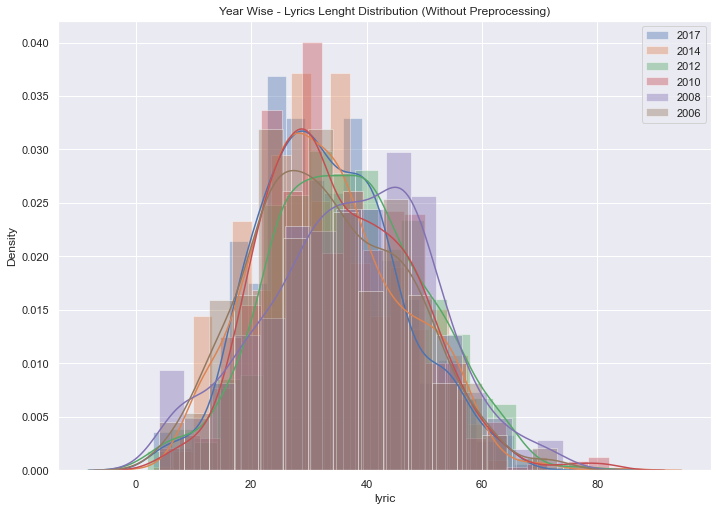

In [19]:
#seaborn 그래프 설정
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 연도별로 lyric 문자열 길이 시각화
y1 = data[data['year'] == 2017]['lyric'].str.len()
sns.distplot(y1, label='2017')
y2 = data[data['year'] == 2014]['lyric'].str.len()
sns.distplot(y2, label='2014')
y3 = data[data['year'] == 2012]['lyric'].str.len()
sns.distplot(y3, label='2012')
y4 = data[data['year'] == 2010]['lyric'].str.len()
sns.distplot(y4, label='2010')
y5 = data[data['year'] == 2008]['lyric'].str.len()
sns.distplot(y5, label='2008')
y6 = data[data['year'] == 2006]['lyric'].str.len()
sns.distplot(y6, label='2006')
plt.title('Year Wise - Lyrics Lenght Distribution (Without Preprocessing)')
plt.legend();

In [20]:
# 훈련데이터 생성/위에 get_features 함수 적용시켜 새로운 데이터 프레임 생성시킴
train = get_features(data)
data_pair = data.filter(['year','total_length','capitals','caps_vs_length','num_words','num_unique_words','words_vs_unique'],axis=1)

In [23]:
data.head().T # T는 컬럼을 index 주소로 들어가게끔 만들어줌(세로로 보여줌)

,0,1,2,3,4
artist,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift
album,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift
track_title,Tim McGraw,Tim McGraw,Tim McGraw,Tim McGraw,Tim McGraw
track_n,1,1,1,1,1
lyric,He said the way my blue eyes shined,Put those Georgia stars to shame that night,"I said, ""That's a lie""",Just a boy in a Chevy truck,That had a tendency of gettin' stuck
line,1,2,3,4,5
year,2006,2006,2006,2006,2006
total_length,35,43,22,27,36
capitals,1,2,2,2,1
caps_vs_length,0.0285714,0.0465116,0.0909091,0.0740741,0.0277778


# Pairplot allows us to see both distribution of single variables and relationships between two variables.

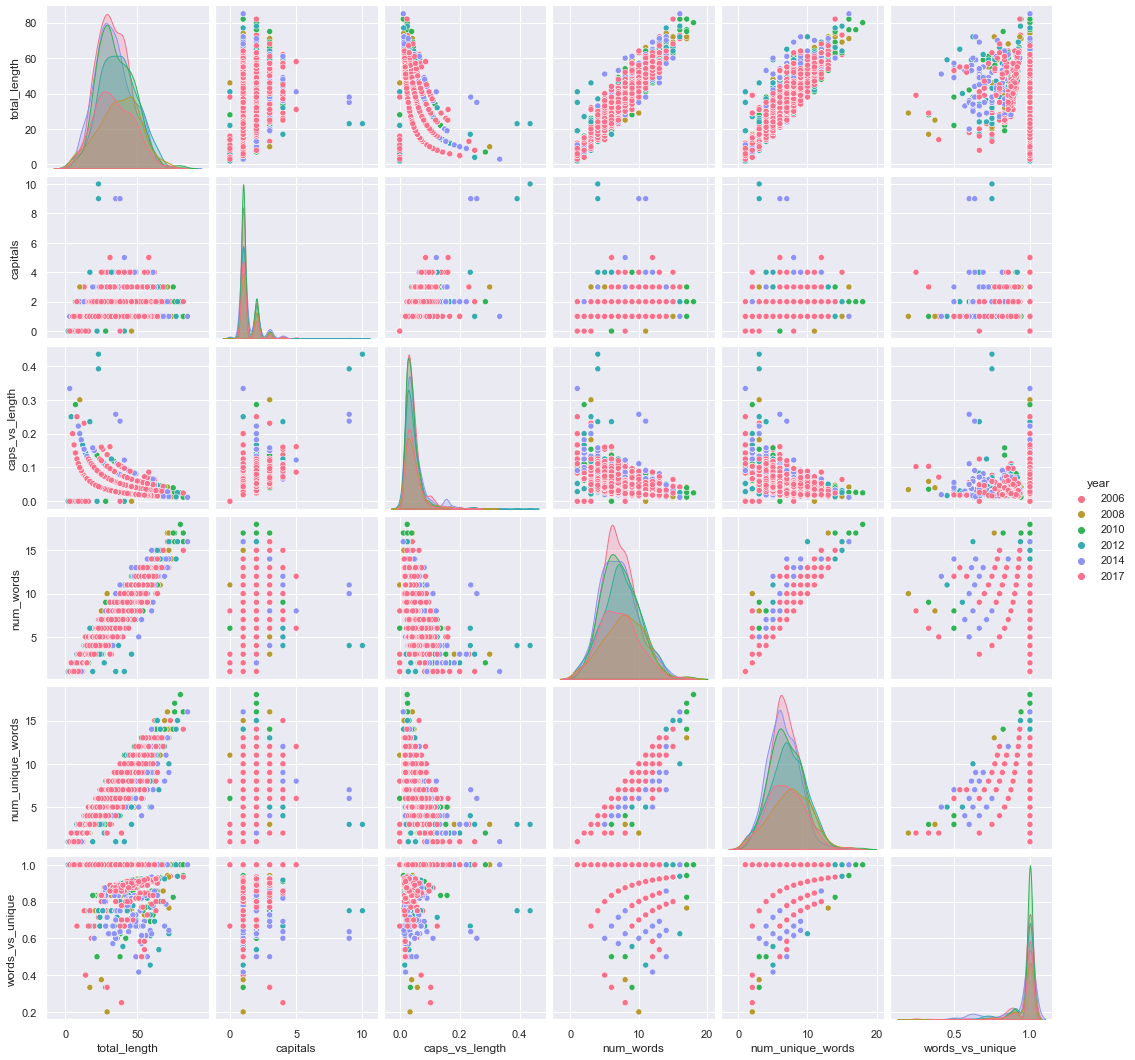

In [24]:
sns.pairplot(data_pair,hue='year',palette="husl");

# Expanding English language contractions
영어 축약형까지 포함되게끔 한다

In [25]:
contraction_mapping_1 = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would", 
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [26]:
#축약형 함수 처리
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [27]:
def get_features(df):    
    data['Clean_Lyrics'] = data['Clean_Lyrics'].apply(lambda x:str(x))
    data['total_length'] = data['Clean_Lyrics'].apply(len)
    data['capitals'] = data['Clean_Lyrics'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    data['caps_vs_length'] = data.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    data['num_words'] = data.lyric.str.count('\S+')
    data['num_unique_words'] = data['Clean_Lyrics'].apply(lambda comment: len(set(w for w in comment.split())))
    data['words_vs_unique'] = data['num_unique_words'] / df['num_words']  
    return df

In [28]:
data['Clean_Lyrics'] = data['lyric'].apply(lambda x: clean_contractions(x, contraction_mapping_1))
#Stopwords
data['Clean_Lyrics'] = data['Clean_Lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
#Re-calculate the features
train = get_features(data)

In [29]:
data.head().T

,0,1,2,3,4
artist,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift
album,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift,Taylor Swift
track_title,Tim McGraw,Tim McGraw,Tim McGraw,Tim McGraw,Tim McGraw
track_n,1,1,1,1,1
lyric,He said the way my blue eyes shined,Put those Georgia stars to shame that night,"I said, ""That's a lie""",Just a boy in a Chevy truck,That had a tendency of gettin' stuck
line,1,2,3,4,5
year,2006,2006,2006,2006,2006
total_length,28,29,20,20,27
capitals,1,2,2,2,1
caps_vs_length,0.0357143,0.0689655,0.1,0.1,0.037037


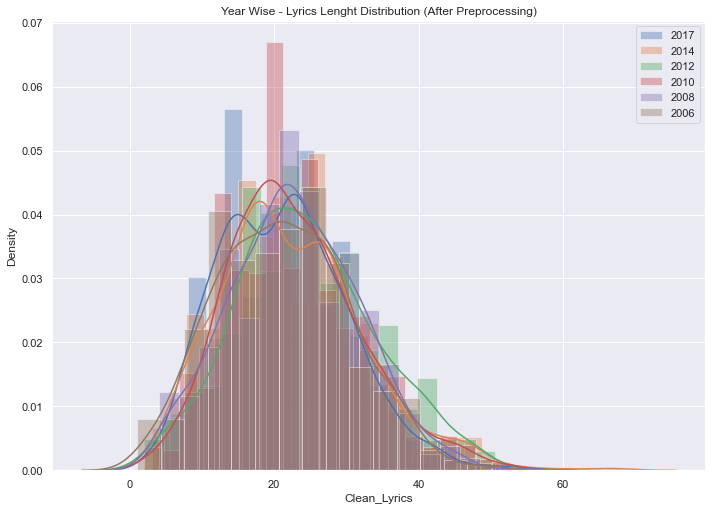

In [31]:
#축약형 처리 후 그래프 다시 그리기
sns.set(rc={'figure.figsize':(11.7,8.27)})
y1 = data[data['year'] == 2017]['Clean_Lyrics'].str.len()
sns.distplot(y1, label='2017')
y2 = data[data['year'] == 2014]['Clean_Lyrics'].str.len()
sns.distplot(y2, label='2014')
y3 = data[data['year'] == 2012]['Clean_Lyrics'].str.len()
sns.distplot(y3, label='2012')
y4 = data[data['year'] == 2010]['Clean_Lyrics'].str.len()
sns.distplot(y4, label='2010')
y5 = data[data['year'] == 2008]['Clean_Lyrics'].str.len()
sns.distplot(y5, label='2008')
y6 = data[data['year'] == 2006]['Clean_Lyrics'].str.len()
sns.distplot(y6, label='2006')
plt.title('Year Wise - Lyrics Lenght Distribution (After Preprocessing)')
plt.legend();

In [32]:
data['year'].value_counts()

2017    1006
2014     953
2010     930
2012     845
2006     567
2008     561
Name: year, dtype: int64

In [33]:
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, col, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df[col]:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="skyblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="skyblue")

    ax[0].set_xlabel('Word count', size=14, color="green")
    ax[0].set_ylabel('Words', size=18, color="green")
    ax[0].set_title('Top words in 2017 Lyrics', size=18, color="green")

    ax[1].set_xlabel('Word count', size=14, color="green")
    ax[1].set_ylabel('Words', size=18, color="green")
    ax[1].set_title('Top words in 2008 Lyrics', size=18, color="green")

    fig.subplots_adjust(wspace=space)
    
    plt.show()

# Ngram Lyrics Anaysis 2017 vs 2008


- N-gram은 문자열에서 N개의 연속된 요소를 추출하는 방법입니다. 만약 'Hello'라는 문자열을 문자(글자) 단위 2-gram으로 추출하면 다음과 같이 됩니다.

He

el

ll

lo

- 참고 : https://dojang.io/mod/page/view.php?id=2332 

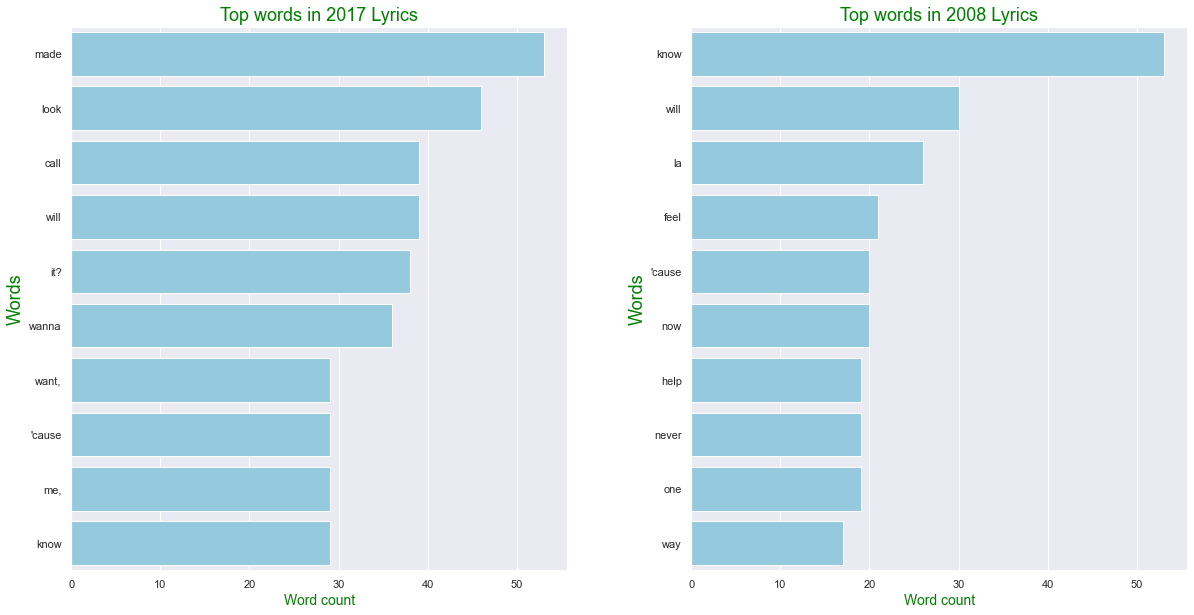

In [34]:
# def generate_ngrams(df, col, n_gram, max_row): / 1- gram, 10개 행 보여줌
Lyrics_2017 = generate_ngrams(train[train["year"]==2017], 'Clean_Lyrics', 1, 10) 
Lyrics_2008 = generate_ngrams(data[data["year"]==2008], 'Clean_Lyrics', 1, 10)
comparison_plot(Lyrics_2017,Lyrics_2008,'word','wordcount', 0.25)

# Bigram Lyrics Anaysis 2017 vs 2008

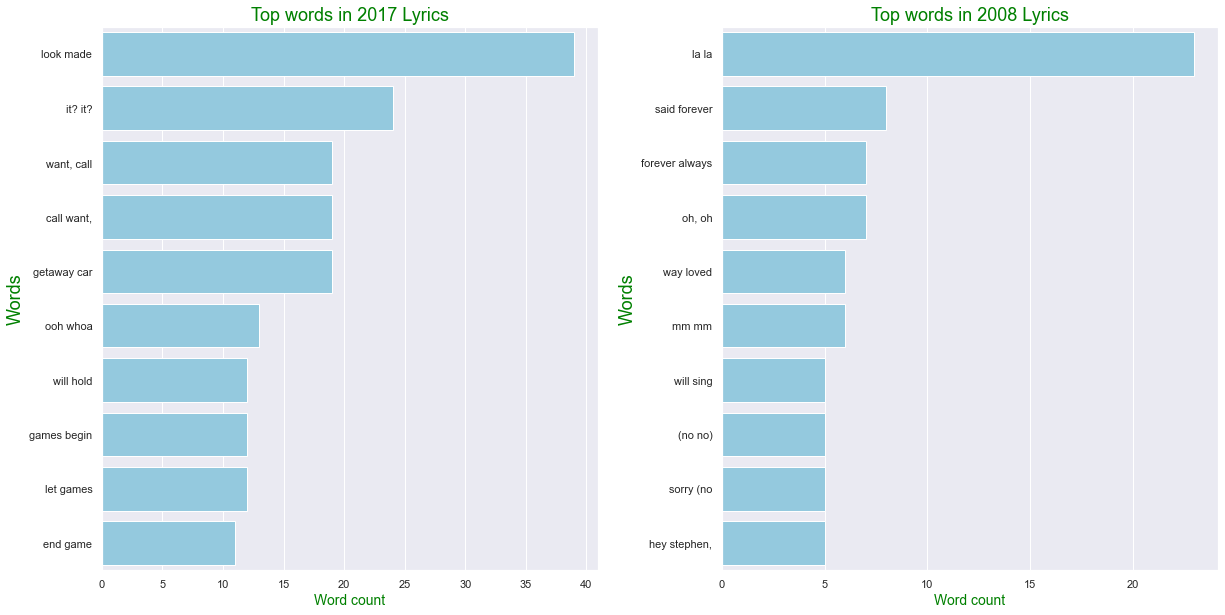

In [35]:
# def generate_ngrams(df, col, n_gram, max_row): / 2- gram, 10개 행 보여줌
Lyrics_2017 = generate_ngrams(train[train["year"]==2017], 'Clean_Lyrics', 2, 10)
Lyrics_2008 = generate_ngrams(data[data["year"]==2008], 'Clean_Lyrics', 2, 10)
comparison_plot(Lyrics_2017,Lyrics_2008,'word','wordcount', 0.25)

# Trigram Lyrics Anaysis 2017 vs 2008

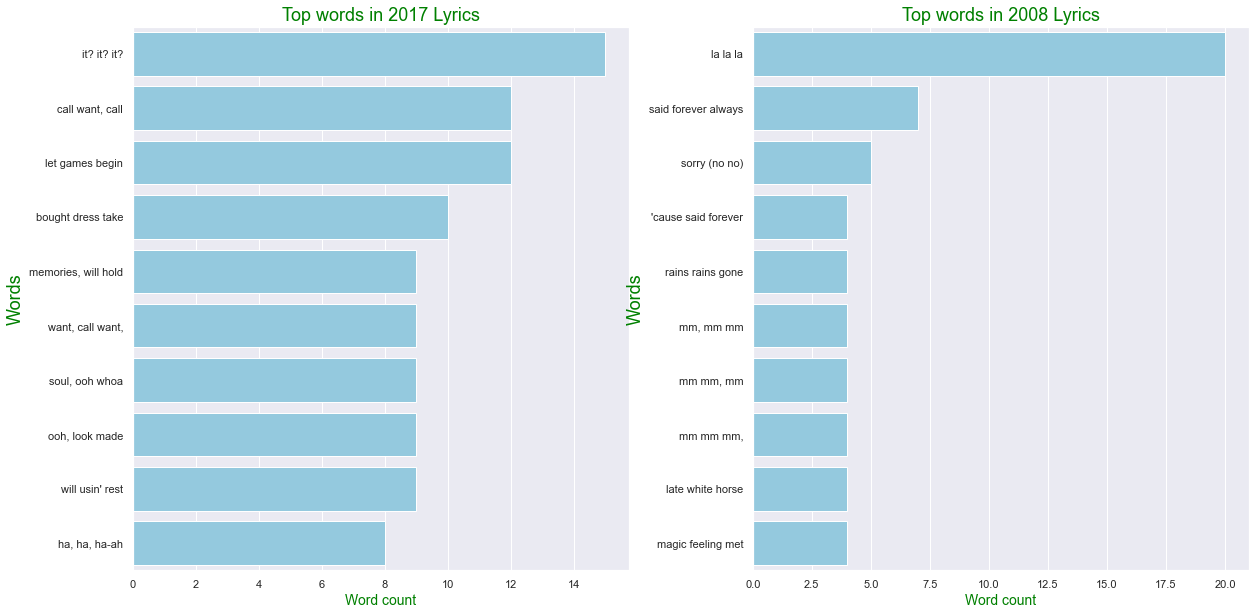

In [38]:
# def generate_ngrams(df, col, n_gram, max_row): / 3- gram, 10개 행 보여줌
Lyrics_2017 = generate_ngrams(train[train["year"]==2017], 'Clean_Lyrics', 3, 10)
Lyrics_2008 = generate_ngrams(data[data["year"]==2008], 'Clean_Lyrics', 3, 10)
comparison_plot(Lyrics_2017,Lyrics_2008,'word','wordcount', 0.25)

Scattertext is an open source tool for visualizing linguistic variation between document categories in a language-independent way. The tool presents a scatterplot, where each axis corresponds to the rank-frequency a term occurs in a category of documents. Through a tie-breaking strategy, the tool is able to display thousands of visible term-representing points and find space to legibly label hundreds of them. Scattertext also lends itself to a query-based visualization of how the use of terms with similar embeddings differs between document categories, as well as a visualization for comparing the importance scores of bag-of-words features to univariate metrics.

Scattertext는 언어 독립적인 방식으로 문서 범주 간의 언어적 변화를 시각화하기 위한 오픈 소스 도구입니다. 이 도구는 각 축이 문서 범주에서 용어가 발생하는 순위 빈도에 해당하는 산점도를 표시합니다. 동점 전략을 통해 이 도구는 수천 개의 눈에 보이는 용어 표현 지점을 표시하고 수백 개에 읽기 쉽게 레이블을 지정할 수 있는 공간을 찾을 수 있습니다. Scattertext는 또한 유사한 임베딩이 있는 용어의 사용이 문서 범주 간에 어떻게 다른지에 대한 쿼리 기반 시각화와 일변량 메트릭에 대한 단어 모음 기능의 중요도 점수를 비교하기 위한 시각화에 적합합니다.


In [40]:
!pip install scattertext

  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9299 sha256=d86b7d7275af345abda53956fa0e4220ac8e9c01773f970b4f697ec6f095a2af
  Stored in directory: c:\users\mycom\appdata\local\pip\cache\wheels\a6\2c\3e\f78da03b67d65cc01f2d8dcf0b53d00f683eac36d03027be42
Successfully built flashtext
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [44]:
!pip install -U pip setuptools wheel

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\MyCom\\AppData\\Local\\Temp\\pip-uninstall-3zg5dxit\\pip.exe'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


# Language Processing Pipelines

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

텍스트에서 nlp를 호출하면 spaCy는 먼저 텍스트를 토큰화하여 Doc 개체를 생성합니다. 그런 다음 문서는 여러 단계로 처리됩니다. 이를 처리 파이프라인이라고도 합니다. 훈련된 파이프라인에서 사용하는 파이프라인에는 일반적으로 태거(tagger), 표제어(lemmatizer), 파서(parser) 및 엔티티 인식기가 포함됩니다. 각 파이프라인 구성 요소는 처리된 문서를 반환하고 다음 구성 요소로 전달됩니다.

참고 - https://spacy.io/usage/processing-pipelines


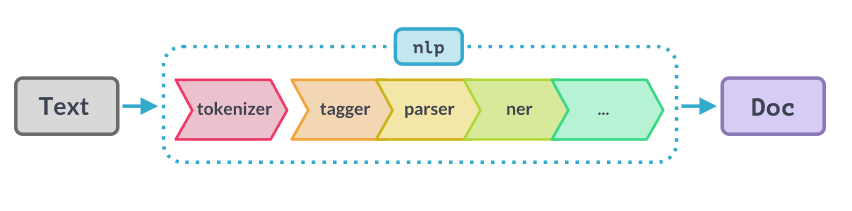

In [47]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/kaggle/Explore The Taylor Swift Lyrics - NLP/data/20211011_162328_1.png")


In [46]:
import scattertext as st
nlp = spacy.load('en_core_web_sm', disable=["tagger","ner"])
data['parsed'] = data.Clean_Lyrics.apply(nlp)

In [48]:
corpus = st.CorpusFromParsedDocuments(data, category_col='album', parsed_col='parsed').build()

In [49]:
html = st.produce_scattertext_explorer(corpus,
          category='reputation',
          category_name='reputation',
          not_category_name='1989',
          width_in_pixels=600,
          minimum_term_frequency=5,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
          )

In [50]:
filename = "reputation-vs-1989.html"
open(filename, 'wb').write(html.encode('utf-8'))
IFrame(src=filename, width = 800, height=700)

773843

# reputation-vs-1989.html 이 ipynb에서 안보이기 때문에 
[https://seongjae-yoo.github.io/ExploreTheTaylorSwiftLyricsNLP#d3-div-1-snippets]
여기에서 실행 결과 화면 확인 가능합니다